In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize
# Step 2: Enable interactive mode for Jupyter Notebook
%matplotlib inline
np.set_printoptions(formatter={'float_kind': lambda x: f"{x:0.6f}"})

# 1. Load, scale and display data

In [2]:
df = pd.read_excel('data5.xlsx')

In [3]:
df

,x1,x2,x3,x4,y,Notes
0,0.438350,0.804340,0.210245,0.151295,0.112940,NaN
1,0.706051,0.534192,0.264243,0.482088,4.210898,NaN
2,0.153786,0.729382,0.422598,0.443074,8.847992,NaN
3,0.126885,0.153430,0.770162,0.190518,9.972332,NaN
4,0.758653,0.536518,0.656000,0.360342,18.301380,NaN
5,0.677491,0.358510,0.479592,0.072880,24.423088,NaN
6,0.725262,0.479870,0.088947,0.759760,28.866752,NaN
7,0.355482,0.639619,0.417618,0.122604,45.181570,NaN
8,0.553621,0.667350,0.323806,0.814870,57.571537,NaN
9,0.306889,0.316878,0.622634,0.095399,63.476716,NaN


In [4]:
df = df.drop(columns=['Notes'])
df=df.dropna()

In [5]:
df['y'] = np.log(df['y'])

In [6]:
df

,x1,x2,x3,x4,y
0,0.438350,0.804340,0.210245,0.151295,-2.180900
1,0.706051,0.534192,0.264243,0.482088,1.437676
2,0.153786,0.729382,0.422598,0.443074,2.180191
3,0.126885,0.153430,0.770162,0.190518,2.299814
4,0.758653,0.536518,0.656000,0.360342,2.906976
5,0.677491,0.358510,0.479592,0.072880,3.195529
6,0.725262,0.479870,0.088947,0.759760,3.362690
7,0.355482,0.639619,0.417618,0.122604,3.810689
8,0.553621,0.667350,0.323806,0.814870,4.053028
9,0.306889,0.316878,0.622634,0.095399,4.150673


# 2. Visualise data on plots

In [7]:
top_2_indices = df['y'].nlargest(1).index
top_qntl_index = df['y'].nlargest(5).index
colors = np.full(df.shape[0], 'b', dtype=object)  # Default color is blue
colors[df['y'].nlargest(5).index] = 'r'
colors[df['y'].nsmallest(5).index] = 'y'  # Color top points red

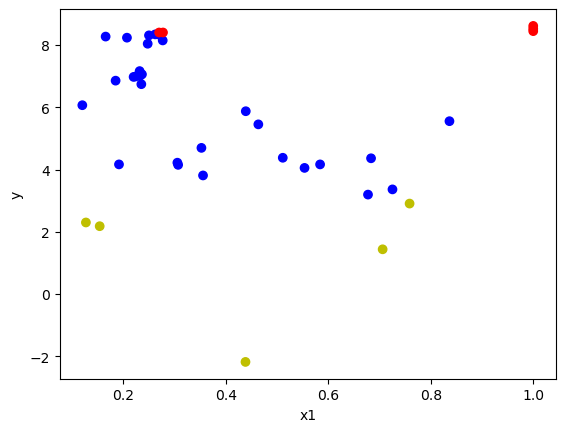

In [8]:
plt.scatter(df['x1'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x1')
plt.show()

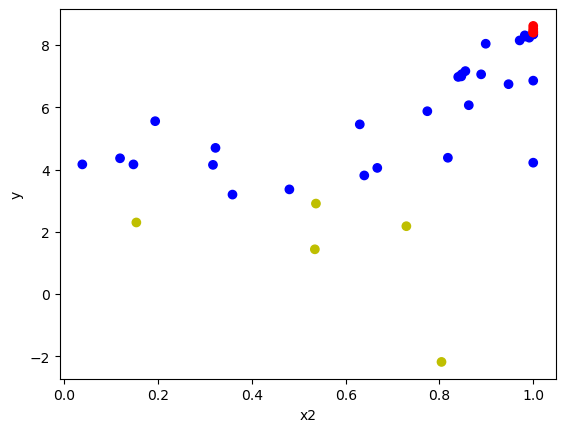

In [9]:
plt.scatter(df['x2'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x2')
plt.show()

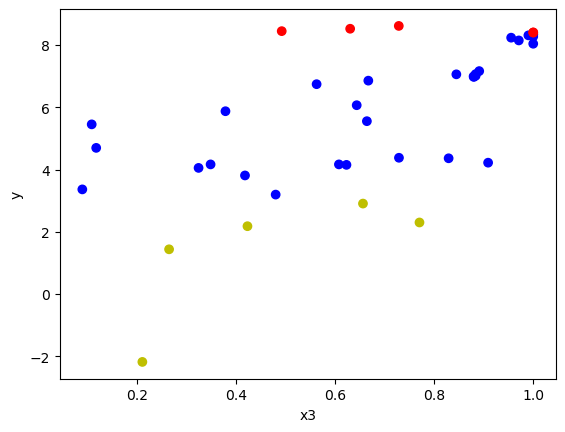

In [10]:
plt.scatter(df['x3'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x3')
plt.show()

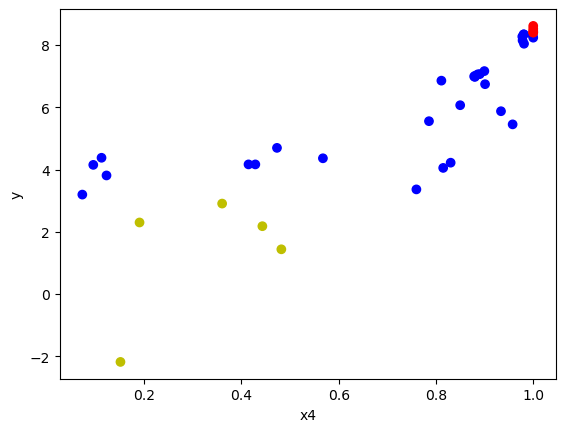

In [11]:
plt.scatter(df['x4'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x4')
plt.show()

# You can rotate in 3 dimentions, color is y values

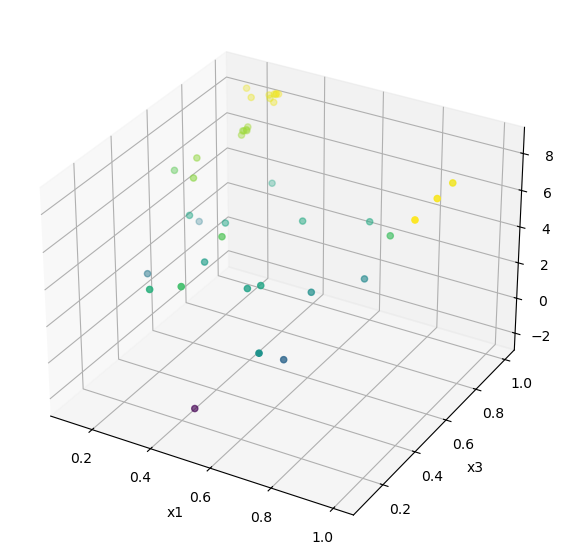

In [12]:
#%matplotlib notebook
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
colors=df['y'].sort_values()
# Plot the surface
ax.scatter(df['x1'], df['x3'], df['y'], c = colors, cmap='viridis')
# Set labels
ax.set_xlabel('x1')
ax.set_ylabel('x3')
ax.set_zlabel('y')
# Display the plot
plt.show()

In [13]:
%matplotlib inline

# 3. Build the grid for Optimization
fine tune the size of grid for high dimention!

In [14]:
x = np.linspace(0,0.999999,40).reshape(-1,1)

In [15]:
x_grid = np.array([[x1, x2, x3, x4] for x1 in x for x2 in x for x3 in x for x4 in x ])

In [16]:
x_grid = x_grid.squeeze()

In [17]:
X = df.iloc[:,:-1].to_numpy()

In [18]:
y = df.iloc[:,-1].to_numpy()

# 4. Use Gaussian Process Regressor with Radial Based Function 

In [19]:
kernel = RBF(length_scale = (0.2,0.2,0.2,0.2), length_scale_bounds=(1e-4,1e4))

In [20]:
# Apply workaround with custom optmizer to get rid of max_iter warning
from scipy.optimize import fmin_l_bfgs_b

# Custom optimizer with maxiter set
def custom_optimizer(obj_func, initial_theta, bounds):
    optimized_result = fmin_l_bfgs_b(
        obj_func,
        initial_theta,
        bounds=bounds,
        maxiter=10000  # Increase maxiter as needed
    )
    # fmin_l_bfgs_b returns (optimized_params, min_value, info_dict)
    return optimized_result[0], optimized_result[1]

# Create the GaussianProcessRegressor with the custom optimizer
bo_model = GaussianProcessRegressor(
    kernel=kernel,
    alpha=1e-10,
    n_restarts_optimizer=1000,
    normalize_y=True,
    optimizer=custom_optimizer
)

In [21]:
bo_model.fit(X, y)

GaussianProcessRegressor(kernel=RBF(length_scale=[0.2, 0.2, 0.2, 0.2]),
                         n_restarts_optimizer=1000, normalize_y=True,
                         optimizer=<function custom_optimizer at 0x000002BFBC7C3250>)

In [22]:
# Check that predicted values are equal originals - this is just a control point
# np.column_stack( (y,bo_model.predict(X)) )

In [23]:
# check the scale parameter
bo_model.kernel_.length_scale

array([28.838281, 0.207516, 0.238187, 0.105134])

In [24]:
# Predict for the grid
post_mean, post_std = bo_model.predict(x_grid, return_std=True)

In [25]:
# Define aquiring function, you can change 2 to 1 or 0 depends upon the strategy 
a_fun = post_mean + 1 * post_std # <- Fine tune it depends from strategy

In [26]:
# Find the index and maximum value of acquiring function
i = np.argmax(a_fun)
print('The maximum of acquiring function is', a_fun[i],'the max index is',i)
print('post_mean =', post_mean[i],' post_std =', post_std[i])
print('the next point for Bayesian Optimization is',x_grid[i])
np.exp(a_fun[i])

The maximum of acquiring function is 9.929274898284653 the max index is 2558759
post_mean = 8.3668449557885  post_std = 1.5624299424961547
the next point for Bayesian Optimization is [0.999999 0.999999 0.205128 0.999999]


20522.454318243

In [27]:
# I would like to find out the points even better than grid
# I use optimize.minimize function over bayesian predictor
# This piece of code is useful for multi-dimentionsfrom scipy.optimize import minimize
def aquisition_fun(x):
    x = np.atleast_2d(x)
    post_mean, post_std = bo_model.predict(x, return_std=True)
    return -(post_mean + 1 * post_std)
result = minimize(aquisition_fun, x_grid[i], bounds=[(0, 0.999999)]*4, tol=1e-8)
optimal_point = result.x
optimal_value = np.exp(-result.fun)
print(f"Optimal value {optimal_value:0.6f}")
print("at point", optimal_point)

Optimal value 20525.185567
at point [0.999999 0.999999 0.203106 0.999999]


# 5. Find the next point based on linear gradient from max point

In [52]:
# Find the maximum value in y and its index
max_index = top_2_indices[0]
max_value = y[max_index]
print("Some analytics for hyperplain:")
print('max value =', max_value)
# Calculate distances from the point with maximum y to all other points
distances = np.linalg.norm(X - X[max_index], axis=1)
closest_indices = np.argsort(distances)[1:6] #<- To fine tune the number of points to research & build surrounding plane 
indices_to_use = np.concatenate(([max_index], closest_indices))
# Show average distance of closest points. Step should not be far away
mean_dist = distances[indices_to_use].mean()
print("Average distance",mean_dist)
# Extract the points and their corresponding y values
X_selected = X[indices_to_use]
y_selected = y[indices_to_use]
# Fit a linear hyperplane using the selected points
l2_model = LinearRegression()
l2_model.fit(X_selected, y_selected, sample_weight = 4/(1 + 4 * distances[indices_to_use]/mean_dist))
# Coefficients of the linear hyperplane
coefficients = l2_model.coef_
intercept = l2_model.intercept_
# Calculate the covariance matrix of the feature matrix X
cov_matrix = np.cov(X_selected, rowvar=False)
# Calculate the determinant of the covariance matrix
det_cov_matrix = np.linalg.det(cov_matrix)
print("Determinant of the covariance matrix should not be 0:", det_cov_matrix)
# Define the maximum point
max_point = X[max_index]
# Calculate the gradient of the hyperplane
gradient = coefficients
# THIS IS IMPORTANT
# Define the distance to move along the gradient direction depends on surroundings and predicted value
distance = 1 # <- To fine tune the distance
# Normalize the gradient to unit length
gradient_unit = gradient / np.linalg.norm(gradient)
# Move from the maximum point in the direction of the gradient by the specified distance
highest_point_on_hyperplane = np.clip(max_point + distance * gradient_unit, 0, 0.999999)
# Calculate the y value at this highest point
highest_y_value_on_hyperplane = l2_model.predict([highest_point_on_hyperplane])[0]
print("X selected points, Y selected,Y predicted, Distance from max")
print(np.column_stack( (X_selected, y_selected, l2_model.predict(X_selected), distances[indices_to_use])))
print("Highest point on hyperplane within",distance,"distance:", highest_point_on_hyperplane)
print("Highest y value on hyperplane within",distance,"distance:", highest_y_value_on_hyperplane)
print("Gradient",gradient)
point1 = highest_point_on_hyperplane

Some analytics for hyperplain:
max value = 8.615019088058835
Average distance 0.41448394518372567
Determinant of the covariance matrix should not be 0: 1.8089945194864377e-08
X selected points, Y selected,Y predicted, Distance from max
[[0.999999 0.999999 0.728348 0.999999 8.615019 8.610696 0.000000]
 [0.999999 0.999999 0.630100 0.999999 8.524315 8.538721 0.098248]
 [0.999999 0.999999 0.491822 0.999999 8.447503 8.437420 0.236526]
 [0.438933 0.774092 0.378167 0.933696 5.874388 5.874388 0.702034]
 [0.553621 0.667350 0.323806 0.814870 4.053028 4.053028 0.712626]
 [0.305406 0.999999 0.908830 0.830208 4.220643 4.220643 0.737470]]
Highest point on hyperplane within 1 distance: [0.999999 0.999999 0.770773 0.999999]
Highest y value on hyperplane within 1 distance: 8.641775611395282
Gradient [2.332295 0.167640 0.732586 17.093228]


In [53]:
# Check the model score, it should be close to 1
l2_model.score(X_selected, y_selected)

0.9999862509849262

In [54]:
# Check the distance from max point
np.linalg.norm(highest_point_on_hyperplane - X[max_index])

0.0424245764237301

In [75]:
np.exp(highest_y_value_on_hyperplane)

5663.376858467941

In [55]:
# See covariance matrix to control multicolinearity
print("Covariance matrix:\n", cov_matrix)

Covariance matrix:
 [[0.102737 0.023358 -0.001234 0.023657]
 [0.023358 0.021938 0.025811 0.007470]
 [-0.001234 0.025811 0.049347 0.000730]
 [0.023657 0.007470 0.000730 0.007585]]


In [56]:
# Check what Bayesian think about this point
bo_model.predict([highest_point_on_hyperplane])

array([8.569896])

In [57]:
#weights of points
4/(1 + 4 * distances[indices_to_use]/mean_dist)

array([4.000000, 2.053232, 1.218544, 0.514468, 0.507792, 0.492793])

In [58]:
# Do prinicple components analysis of data seleted for plain surface to double check multicol.
from sklearn.decomposition import KernelPCA, PCA
pca = PCA(n_components = 4)
X_lin = pca.fit(X_selected)
X_lin.explained_variance_ratio_

array([0.634666, 0.343514, 0.017447, 0.004372])

# Build aproximation of quadratic polinome at maxpoint

In [59]:
def num_of_nonl_param(n):
    # function returns the number of minimum points for quadratic polynomal
    n = np.array(n)
    return int(1 + 2 * n + n * (n-1) / 2)

In [60]:
poly = PolynomialFeatures(2, include_bias = False)
XN = poly.fit_transform(X)

In [61]:
max_index=np.argmax(y) 
max_value = y[max_index]
#print('max value =', max_value)
# Calculate distances from the point with maximum y to all other points
distances = np.linalg.norm(X - X[max_index], axis=1)

In [62]:
def apprF(n):
    # Sort the distances and get the indices of the two closest neighbors (excluding itself)
    # THE NUMBER OF POINTS IS EQUIAL TO THE TOTAL DIMENTIONALITY!!!
    closest_indices = np.argsort(distances)[1:n]
    # Indices of the three points (max point + two closest neighbors)
    indices_to_use = np.concatenate(([max_index], closest_indices))
    #print('indices to use', indices_to_use)
    # Show overage distance of closest points. Step should not be far away
    print("Average distance",distances[indices_to_use].mean())
    # Extract the points and their corresponding y values
    XN_selected = XN[indices_to_use]
    y_selected = y[indices_to_use]
    # print(X_selected)
    # Fit a linear hyperplane using the selected points
    lreg = LinearRegression()
    lreg.fit(XN_selected, y_selected)
    print("Y,      Prediction, Distance")
    print(np.column_stack( (y_selected, lreg.predict(XN_selected), distances[indices_to_use]) ))
    print("Score =",lreg.score(XN_selected,y_selected))
    print("Normlized error =", np.linalg.norm(y_selected - lreg.predict(XN_selected)))
    return lreg

In [63]:
num_of_nonl_param(4)

15

In [70]:
lreg = apprF(17) #<- Fine tune this number so solution will be stable

Average distance 0.6565570460953252
Y,      Prediction, Distance
[[8.615019 8.616086 0.000000]
 [8.524315 8.522480 0.098248]
 [8.447503 8.448269 0.236526]
 [5.874388 5.874328 0.702034]
 [4.053028 4.053059 0.712626]
 [4.220643 4.220731 0.737470]
 [8.148991 8.149043 0.763633]
 [8.404072 8.405185 0.772045]
 [8.403527 8.407054 0.779103]
 [8.343249 8.332116 0.781143]
 [8.343371 8.352089 0.786459]
 [7.059641 7.060113 0.788779]
 [6.743039 6.742912 0.790739]
 [8.311941 8.308932 0.794596]
 [7.163866 7.171266 0.804781]
 [7.066234 7.059455 0.806614]
 [8.042472 8.042182 0.806675]]
Score = 0.999990269305946
Normlized error = 0.018132971288913467


In [71]:
X0 = X[max_index,:] 
def opt_fun(x):
    polynom = poly.fit_transform(x.reshape(1, -1))
    return -lreg.predict(polynom)

In [72]:
# define bounds as the solution is not stable!
step = 0.9
bnds = []
for i in range(0,len(X0)): bnds.append( (max(X0[i]-step,0), min(X0[i]+step,0.999999)) )
print('Bonds\n', np.array(bnds))

Bonds
 [[0.099999 0.999999]
 [0.099999 0.999999]
 [0.000000 0.999999]
 [0.099999 0.999999]]


In [73]:
result = minimize(opt_fun, X0, bounds=bnds, tol=1e-5)

In [74]:
print('The next point is',result.x)
print(f'Estimated error{result.fun:0.3f}')

The next point is [0.999999 0.099999 0.999999 0.999999]
Estimated error-44.660


In [69]:
np.exp(-result.fun)

8442.77943221035